In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
import torch.utils.data
from torchvision import datasets, transforms
# from torchvision.utils import save_image

from vae_conv import conv_variational_autoencoder 
import matplotlib.pyplot as plt 
import sys, os 

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)   

In [3]:
channels = 1
# batch_size = cm_train.shape[0]/100
conv_layers = 4
feature_maps = [64,64,64,64]
filter_shapes = [3,3,3,3]
strides = [1,2,1,1]
dense_layers = 2
dense_neurons = [128, 64]
dense_dropouts = [0.0, 0.0]
latent_dim = 2

image_size = train_loader.dataset.train_data.shape[1]

In [5]:
autoencoder = conv_variational_autoencoder(image_size,channels,conv_layers,feature_maps,
                                           filter_shapes,strides,dense_layers,dense_neurons,dense_dropouts,latent_dim)

In [ ]:
opti_dict = {'Adam_with_amsgrad': optim.Adam(autoencoder.model.parameters(), lr=1e-3, amsgrad=True), 'Adam': optim.Adam(autoencoder.model.parameters(), lr=1e-3), 
             'RMSprop': optim.RMSprop(autoencoder.model.parameters(), lr=0.001, alpha=0.9, eps=1e-08), 'Adadelta': optim.Adadelta(autoencoder.model.parameters(), lr=1e-1), 
             'Adagrad': optim.Adagrad(autoencoder.model.parameters(), lr=1e-3), 'Rprop': optim.Rprop(autoencoder.model.parameters(), lr=0.001), 
             'LBFGS': optim.LBFGS(autoencoder.model.parameters())
            }

In [ ]:
for opti in sorted(opti_dict): 
    autoencoder = conv_variational_autoencoder(image_size,channels,conv_layers,feature_maps,
                                           filter_shapes,strides,dense_layers,dense_neurons,dense_dropouts,latent_dim)
    autoencoder.optimizer = opti_dict[opti] 
    print 'Training with optimizer ', opti 
    epochs = 10
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    for epoch in range(1, epochs + 1): 
        autoencoder.train(train_loader, epoch) 
        autoencoder.test(test_loader, epoch) 

    with torch.no_grad(): 
        train_all = train_loader.dataset.train_data.reshape(-1, 1, 28, 28).float()[:2000].to(device)
#         print(train_all.shape)
        decoded = autoencoder.predict(train_all) 
        embeded = autoencoder.return_embeddings(train_all) 
        encoded = autoencoder.encode(train_all) 

    plt.figure(figsize=(10,8))
    plt.scatter(embeded.cpu()[:2000,0], embeded.cpu()[:2000,1], c=train_loader.dataset.train_labels.cpu()[:2000], cmap='tab10') 
    plt.title('Optimizer: %s' % opti)
    plt.colorbar() 
    plt.savefig('./results/%s_result_epoch.pdf' % opti) 

Training with optimizer  Adam
====> Epoch: 1 Average loss: 542.5241 ====> Test set loss: 542.5349
====> Epoch: 2 Average loss: 542.5261 ====> Test set loss: 542.5360
====> Epoch: 3 Average loss: 542.5212 ====> Test set loss: 542.5410


====> Epoch: 1 Average loss: 172.8014 ====> Test set loss: 155.5849
====> Epoch: 2 Average loss: 153.8299 ====> Test set loss: 150.9153
====> Epoch: 3 Average loss: 149.9653 ====> Test set loss: 147.7184
====> Epoch: 4 Average loss: 147.6426 ====> Test set loss: 145.9101
====> Epoch: 5 Average loss: 145.9235 ====> Test set loss: 144.7545
====> Epoch: 6 Average loss: 144.7010 ====> Test set loss: 144.2395
====> Epoch: 7 Average loss: 143.8266 ====> Test set loss: 142.5827
====> Epoch: 8 Average loss: 142.9761 ====> Test set loss: 142.7968
====> Epoch: 9 Average loss: 142.3069 ====> Test set loss: 141.9404
====> Epoch: 10 Average loss: 141.7342 ====> Test set loss: 141.9754


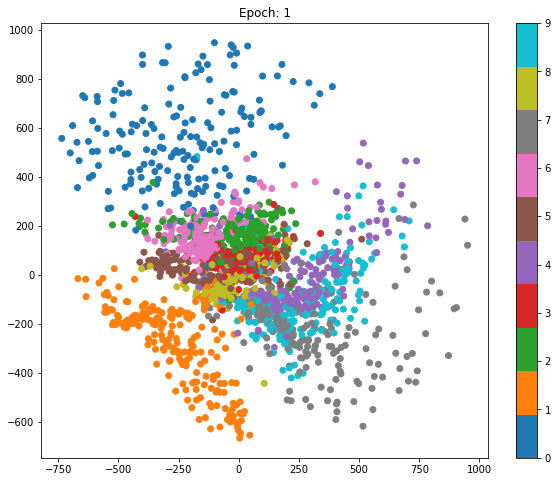

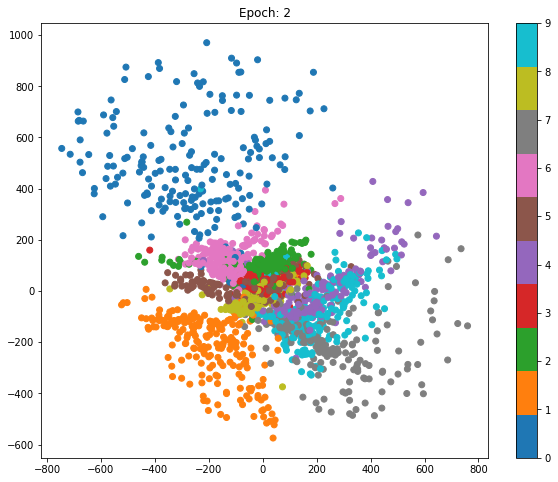

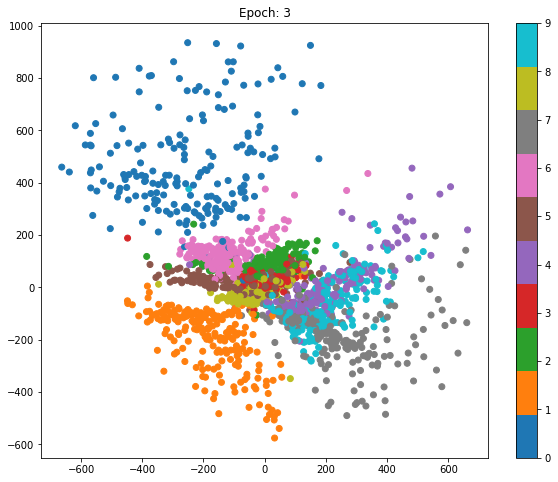

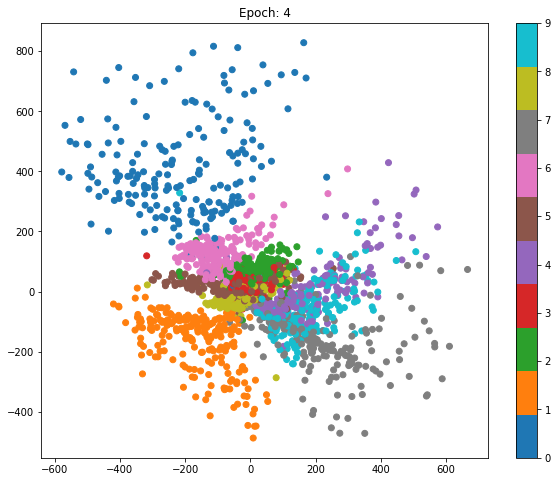

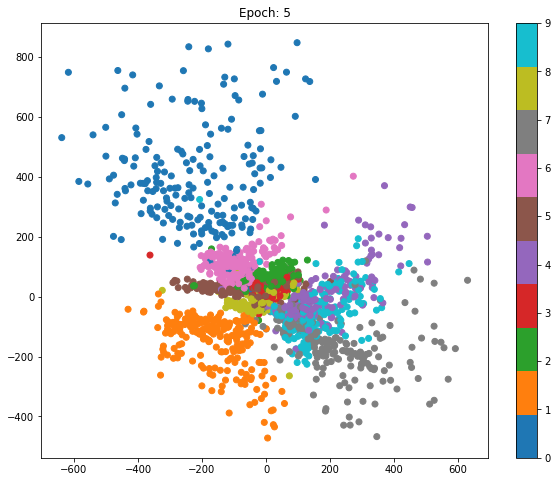

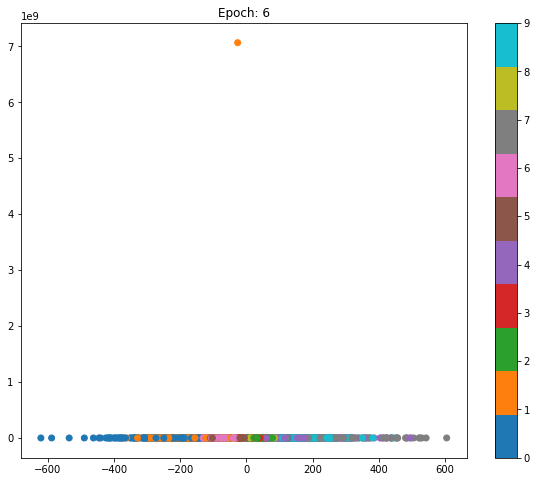

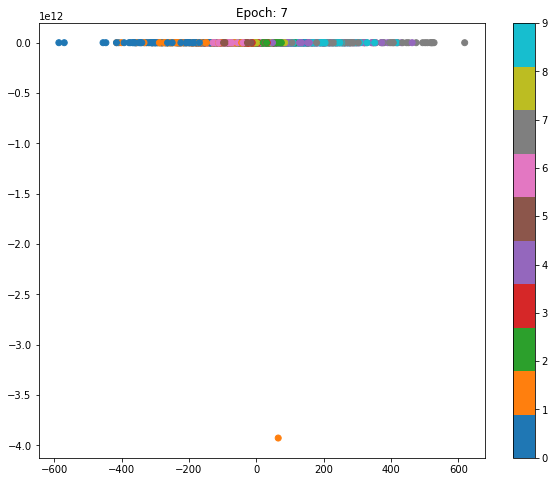

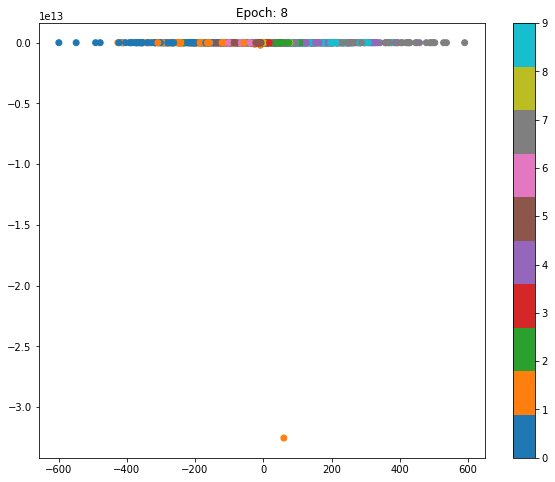

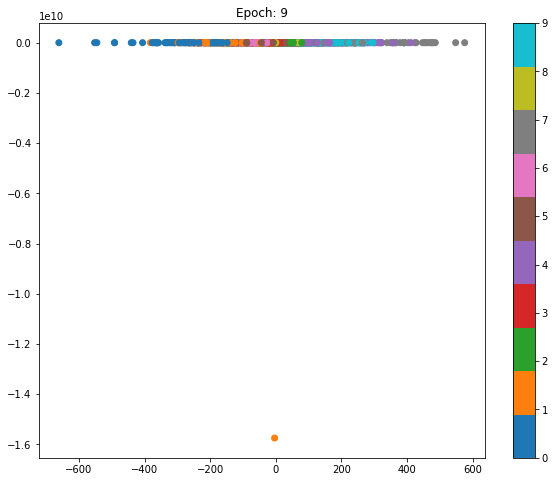

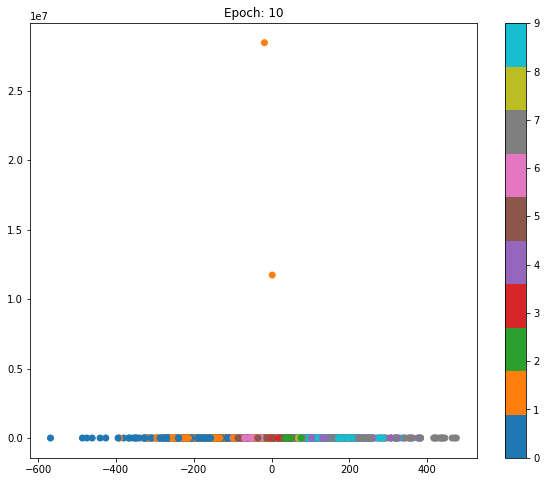

In [5]:
epochs = 10
log_interval = 100 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for epoch in range(1, epochs + 1): 
    autoencoder.train(train_loader, epoch) 
    autoencoder.test(test_loader, epoch) 
    
    with torch.no_grad(): 
        train_all = train_loader.dataset.train_data.reshape(-1, 1, 28, 28).float()[:2000].to(device)
#         print(train_all.shape)
        decoded = autoencoder.predict(train_all) 
        embeded = autoencoder.return_embeddings(train_all) 
        encoded = autoencoder.encode(train_all) 
    
    plt.figure(figsize=(10,8))
    plt.scatter(embeded.cpu()[:2000,0], embeded.cpu()[:2000,1], c=train_loader.dataset.train_labels.cpu()[:2000], cmap='tab10') 
    plt.title('Epoch: %d' % epoch)
    plt.colorbar() 
    plt.savefig('./results/lat5_result_epoch%d.pdf' % epoch) 

In [7]:
sdfasf

NameError: name 'sdfasf' is not defined

In [ ]:
epochs = 1
log_interval = 100
for epoch in range(1, epochs + 1): 
    autoencoder.train(train_loader, epoch) 
    autoencoder.test(test_loader, epoch) 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
with torch.no_grad(): 
    train_all = train_loader.dataset.train_data.reshape(-1, 1, 28, 28).float()[:2000].to(device)
    print(train_all.shape)
    decoded = autoencoder.predict(train_all) 
    embeded = autoencoder.return_embeddings(train_all) 
    encoded = autoencoder.encode(train_all) 

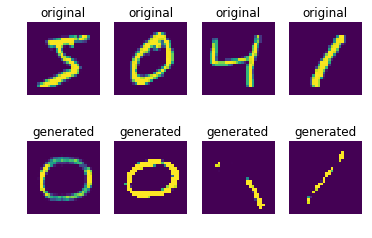

In [8]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(nrows=2, ncols=4) 

for i in range(4): 
    ax[0,i].imshow(np.squeeze(train_all.cpu())[i]) 
    ax[0,i].set_title('original')
    ax[1,i].imshow(np.squeeze(decoded.cpu())[i]) 
    ax[1,i].set_title('generated')
    ax[0,i].axis('off') 
    ax[1,i].axis('off')
plt.show()

(-200, 200)

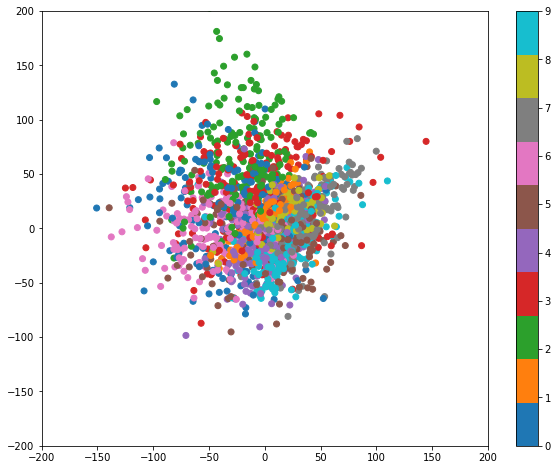

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(embeded.cpu()[:2000,0], embeded.cpu()[:2000,1], c=train_loader.dataset.train_labels.cpu()[:2000], cmap='tab10')
plt.colorbar() 
plt.xlim(-200, 200)
plt.ylim(-200, 200)

In [17]:
encoded[0][1302]

tensor([ 70.1495, 118.5995,  23.5639,   8.4718,  27.3958], device='cuda:0')

In [18]:
def reparameterize(mu, logvar): 
    # eps * exp(-0.5 * logvar) + mu 
    std = torch.exp(0.5*logvar)
    eps = torch.randn_like(std) 
    return eps.mul(std).add_(mu)

In [19]:
reparameterize(encoded[0][1302], encoded[1][1302])

tensor([ 9.2034e+03,  1.1860e+02,  2.3564e+01, -1.1864e+06, -1.5131e+07],
       device='cuda:0')

In [11]:
np.where(embeded.cpu()>10000)

(array([1302, 1302]), array([0, 4]))

In [111]:
>>> input = torch.randn(1, 16, 12, 12)
>>> downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
>>> upsample = nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1)
>>> h = downsample(input)
>>> print(h.size())
>>> output = upsample(h, output_size=input.size())
>>> print(output.size())

torch.Size([1, 16, 6, 6])
torch.Size([1, 16, 12, 12])


In [113]:
>>> input = torch.randn(1, 16, 12, 12)
>>> downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
>>> upsample = nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1, output_padding=1)
>>> h = downsample(input)
>>> print(h.size())
>>> output = upsample(h)
>>> print(output.size())

torch.Size([1, 16, 6, 6])
torch.Size([1, 16, 12, 12])


In [127]:
m = nn.Dropout(p=0.2)
input = torch.randn(20, 16)
output = m(input)

len(output[output == 0.0])/20.0/16

In [138]:
m = nn.Dropout2d(p=0.2)
input = torch.randn(20, 16, 32, 32)
output = m(input)

len(output[output == 0.0])/20.0/16/32/32

In [31]:
recon_x = -torch.rand(100) 
x = -torch.rand(100) 

In [34]:
F.l1_loss(recon_x, x, reduction='sum')

tensor(31.3982)

In [13]:
from torchsummary import summary 
summary(autoencoder.model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
            Conv2d-2           [-1, 64, 14, 14]          36,928
            Conv2d-3           [-1, 64, 14, 14]          36,928
         Dropout2d-4                [-1, 12544]               0
            Linear-5                  [-1, 128]       1,605,760
            Linear-6                    [-1, 5]             645
            Linear-7                    [-1, 5]             645
            Linear-8                  [-1, 128]             768
            Linear-9                [-1, 12544]       1,618,176
  ConvTranspose2d-10           [-1, 64, 14, 14]          36,928
  ConvTranspose2d-11           [-1, 64, 14, 14]          36,928
  ConvTranspose2d-12            [-1, 1, 28, 28]             577
Total params: 3,374,923
Trainable params: 3,374,923
Non-trainable params: 0
---------------------------